# <font color='blue'>Data Science Academy - Python Fundamentos - Capítulo 9</font>

## Download: http://github.com/dsacademybr

## Mini-Projeto 2 - Análise Exploratória em Conjunto de Dados do Kaggle

## Análise 1

In [1]:
# Imports
import os
import subprocess
import stat
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
sns.set(style = "white")
%matplotlib inline

In [2]:
# Dataset
clean_data_path = "dataset/autos.csv"
df = pd.read_csv(clean_data_path,encoding = "latin-1")

In [3]:
df

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,...,postalCode,lastSeen,yearOfCreation,yearCrawled,monthOfCreation,monthCrawled,NoOfDaysOnline,NoOfHrsOnline,yearsOld,monthsOld
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Offer,480,test,Other,1993,manuell,0,...,70435,2016-04-07 03:16:57,2016,2016,March,March,14,3,23,11
1,2016-03-23 10:58:45,A5_Sportback_2.7_Tdi,privat,Offer,18300,test,coupe,2011,manuell,190,...,66954,2016-04-07 01:46:50,2016,2016,March,March,14,1,5,7
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Offer,9800,test,suv,2004,automatik,163,...,90480,2016-04-04 12:47:46,2016,2016,March,March,22,12,12,4
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÃRER,privat,Offer,1500,test,kleinwagen,2001,manuell,75,...,91074,2016-03-17 17:40:17,2016,2016,March,March,0,17,15,5
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Offer,3600,test,kleinwagen,2008,manuell,69,...,60437,2016-04-06 10:17:21,2016,2016,March,March,6,10,8,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313682,2016-03-21 09:50:58,Mitsubishi_Cold,privat,Offer,0,control,Other,2005,manuell,0,...,2694,2016-03-21 10:42:49,2016,2016,March,March,0,10,11,5
313683,2016-03-14 17:48:27,Suche_t4___vito_ab_6_sitze,privat,Offer,2200,test,Other,2005,Unspecified,0,...,39576,2016-04-06 00:46:52,2016,2016,March,March,23,0,11,11
313684,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,privat,Offer,1199,test,cabrio,2000,automatik,101,...,26135,2016-03-11 18:17:12,2016,2016,March,March,6,18,16,9
313685,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,privat,Offer,9200,test,bus,1996,manuell,102,...,87439,2016-04-07 07:15:26,2016,2016,March,March,19,7,20,9


In [4]:
# Colunas
colunas = df.columns
print(colunas)
print(len(colunas))

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'postalCode', 'lastSeen',
       'yearOfCreation', 'yearCrawled', 'monthOfCreation', 'monthCrawled',
       'NoOfDaysOnline', 'NoOfHrsOnline', 'yearsOld', 'monthsOld'],
      dtype='object')
27


In [6]:
# Informações sobre os dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 313687 entries, 0 to 313686
Data columns (total 27 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dateCrawled          313687 non-null  object
 1   name                 313687 non-null  object
 2   seller               313687 non-null  object
 3   offerType            313687 non-null  object
 4   price                313687 non-null  int64 
 5   abtest               313687 non-null  object
 6   vehicleType          313687 non-null  object
 7   yearOfRegistration   313687 non-null  int64 
 8   gearbox              313687 non-null  object
 9   powerPS              313687 non-null  int64 
 10  model                313687 non-null  object
 11  kilometer            313687 non-null  int64 
 12  monthOfRegistration  313687 non-null  object
 13  fuelType             313498 non-null  object
 14  brand                313687 non-null  object
 15  notRepairedDamage    313687 non-nu

In [8]:
# Resumo estatístico
df.describe()

,price,yearOfRegistration,powerPS,kilometer,postalCode,yearOfCreation,yearCrawled,NoOfDaysOnline,NoOfHrsOnline,yearsOld,monthsOld
count,313687.000000,313687.000000,313687.000000,313687.000000,313687.000000,313687.000000,313687.0,313687.000000,313687.000000,313687.000000,313687.000000
mean,3902.961863,2001.909231,109.564250,131435.778340,50349.563597,2015.999930,2016.0,8.543274,11.834207,14.090769,6.235187
std,4168.150636,6.803211,191.741685,34963.149957,25765.545682,0.008374,0.0,8.511917,6.504730,6.803211,3.454766
min,0.000000,1910.000000,0.000000,5000.000000,1067.000000,2015.000000,2016.0,0.000000,0.000000,0.000000,1.000000
25%,999.000000,1998.000000,68.000000,125000.000000,29640.000000,2016.000000,2016.0,2.000000,7.000000,10.000000,3.000000
50%,2490.000000,2002.000000,104.000000,150000.000000,49205.000000,2016.000000,2016.0,6.000000,12.000000,14.000000,6.000000
75%,5400.000000,2006.000000,140.000000,150000.000000,70794.000000,2016.000000,2016.0,13.000000,17.000000,18.000000,9.000000
max,28800.000000,2016.000000,20000.000000,150000.000000,99998.000000,2016.000000,2016.0,384.000000,23.000000,106.000000,11.000000


## Distribuição de Veículos com base no Ano de Registro

Text(0.5, 1.0, 'Distribuição de Veículos com Base no Ano de Registro')

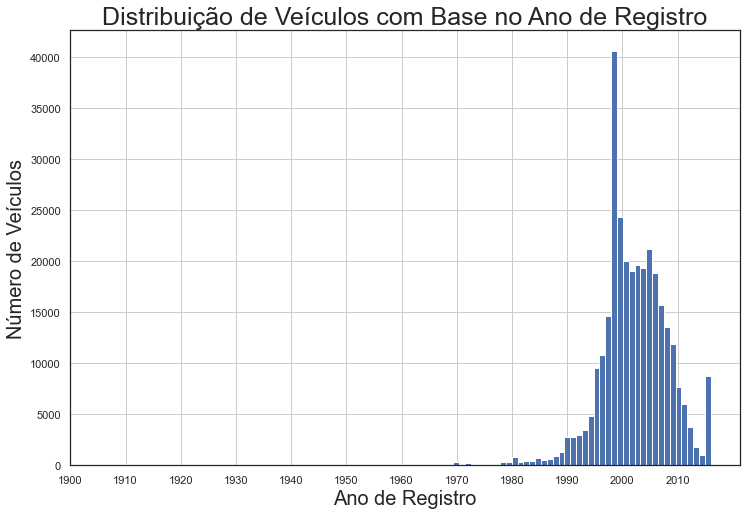

In [47]:
# Crie um Plot com a Distribuição de Veículos com base no Ano de Registro
ano_registro = df['yearOfRegistration']
plt.figure(figsize=(12,8)) # Tamanho da figura
ano_registro.hist(bins=100) # Número de colunas
plt.xlabel('Ano de Registro', fontsize=20)
plt.ylabel('Número de Veículos', fontsize=20)
plt.xticks(range(1900,2020,10)) # Escala do eixo X
plt.title('Distribuição de Veículos com Base no Ano de Registro', fontsize=25)

In [48]:
# Salvando o plot
plt.savefig('distribuição_veículos.png', format='png')

<Figure size 432x288 with 0 Axes>

## Variação da faixa de preço pelo tipo de veículo

In [17]:
# Tipos de Veículos
vehicleType = df['vehicleType'].value_counts()
vehicleType

limousine     84077
kleinwagen    69334
kombi         60195
bus           26833
cabrio        20388
Other         19447
coupe         16920
suv           13585
andere         2908
Name: vehicleType, dtype: int64

Text(0, 0.5, 'Range de Preço')

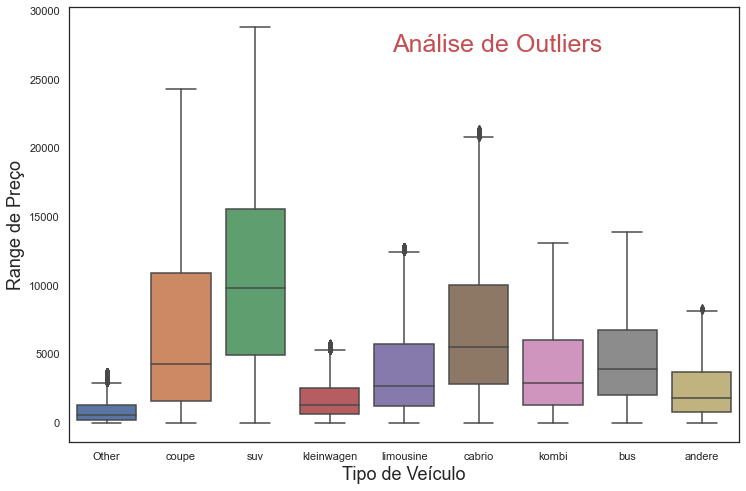

In [71]:
# Crie um Boxplot para avaliar os outliers
f, ax = plt.subplots(figsize=(12, 8))
fig = sns.boxplot(x='vehicleType', y='price', data=df)
ax.text(5.25,27000,'Análise de Outliers', fontsize=25, color='r', ha='center')
ax.xaxis.set_label_text('Tipo de Veículo', fontdict={'size':18})
ax.yaxis.set_label_text('Range de Preço', fontdict={'size':18})

In [72]:
# Salvando o plot
plt.savefig('preço_tipoVeículo_boxplot.png', format='png')

<Figure size 432x288 with 0 Axes>

## Contagem total de veículos à venda conforme o tipo de veículo

Text(0.5, 1.0, 'Contagem Total de Veículos à Venda Conforme o Tipo de Veículo')

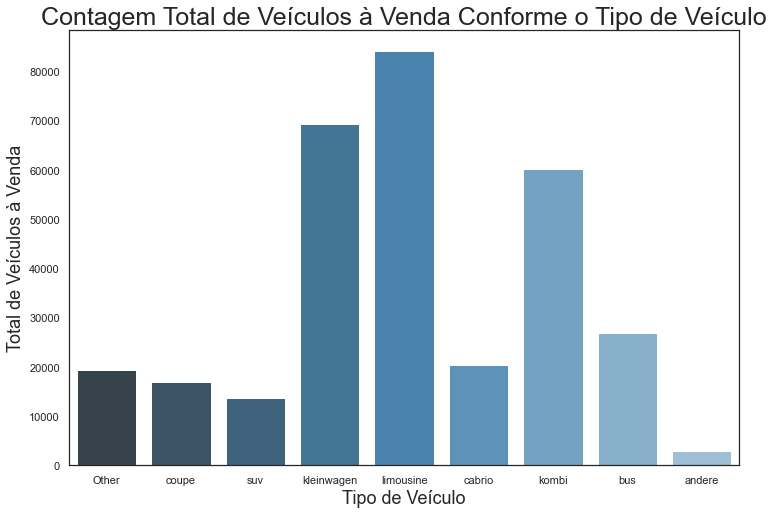

In [77]:
# Crie um Count Plot que mostre o número de veículos pertencentes a cada categoria 
f, ax = plt.subplots(figsize=(12,8))
fig = sns.countplot(x='vehicleType', data=df, palette='Blues_d')
ax.xaxis.set_label_text('Tipo de Veículo', fontdict={'size':18})
ax.yaxis.set_label_text('Total de Veículos à Venda', fontdict={'size':18})
ax.set_title('Contagem Total de Veículos à Venda Conforme o Tipo de Veículo', fontdict={'size':25})

In [78]:
# Salvando o plot
plt.savefig('numero_veículos_countPlot.png', format='png')

<Figure size 432x288 with 0 Axes>

Conheça a Formação Cientista de Dados, um programa completo, 100% online e 100% em português, com 340 horas, mais de 1.200 aulas em vídeos e 26 projetos, que vão ajudá-lo a se tornar um dos profissionais mais cobiçados do mercado de análise de dados. Clique no link abaixo, faça sua inscrição, comece hoje mesmo e aumente sua empregabilidade:

https://www.datascienceacademy.com.br/pages/formacao-cientista-de-dados

# Fim

### Obrigado - Data Science Academy - <a href="http://facebook.com/dsacademybr">facebook.com/dsacademybr</a>